In [114]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from datetime import datetime
import seaborn as sns

# Load datasets with explicit date parsing
stock_df = pd.read_csv('data/AMZN_historical_data.csv')
news_df = pd.read_csv('data/raw_analyst_ratings_1.csv')
# Set datetime index for stock data


# Display basic information and the first few rows of each dataset
stock_df_info = stock_df.info()
news_df_info = news_df.info()

# Step 1: Date Alignment


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4580 entries, 0 to 4579
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4580 non-null   int64  
 1   headline    4580 non-null   object 
 2   url         4580 non-null   object 
 3   publisher   4580 non-null   object 
 4   

In [115]:
stock_df_head = stock_df.head()
news_df_head = news_df.head()

stock_df_info, stock_df_head, news_df_info, news_df_head
# Step 1: Normalize Dates
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date
stock_df['date'] = pd.to_datetime(stock_df['Date'], errors='coerce').dt.date
# Step 2: Perform Sentiment Analysis using TextBlob
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)


# Step 3: Aggregate Sentiment by Date
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()



# Step 4: Compute Daily Stock Returns
stock_df = stock_df.sort_values(by='Date')
stock_df['return'] = stock_df['Close'].pct_change()


In [116]:
# Step 5: Merge Datasets on Date
merged_df = pd.merge(stock_df, daily_sentiment, how='inner', left_on='Date', right_on='date')

In [117]:
# Step 6: Calculate Pearson Correlation
correlation = merged_df[['return', 'sentiment']].corr().iloc[0, 1]

In [118]:
# Display merged dataset head and correlation value
merged_df_head = merged_df[['Date', 'Close', 'return', 'sentiment']].head()
correlation, merged_df_head

(np.float64(nan),
 Empty DataFrame
 Columns: [Date, Close, return, sentiment]
 Index: [])

In [ ]:
# Step 6: Visualization

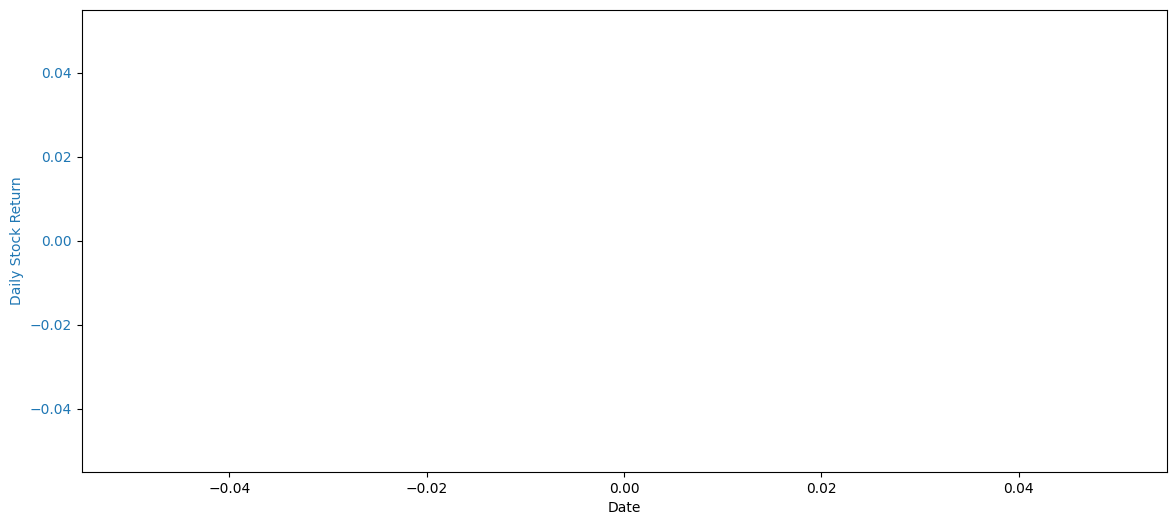

In [119]:
fig, ax1 = plt.subplots(figsize=(14, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily Stock Return', color=color)
ax1.plot(merged_df['Date'], merged_df['return'], color=color, label='Stock Return')
ax1.tick_params(axis='y', labelcolor=color)


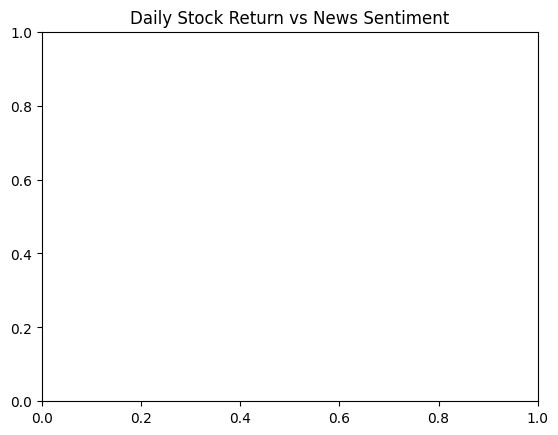

In [120]:
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sentiment Score', color=color)
ax2.plot(merged_df['Date'], merged_df['sentiment'], color=color, label='Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Daily Stock Return vs News Sentiment')
fig.tight_layout()
plt.show()